### CNN Classifier for MNIST

In this exercise, we use a CNN model to classify items from the MNIST dataset. We will be implementing this using PyTorch.

First, we import the necessary modules:

In [37]:
import torch
import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt
from torch import nn
from tqdm import tqdm

#### Dataloaders

We create the train and test dataloaders by using 'torchvision.datasets' to download the MNIST dataset. Some augmentation is also applied to the dataset through 'torchvision.transforms'.

In [38]:
# Define the transformation for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create the dataloaders
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size, shuffle=False)


We sample 16 random samples from the train dataset

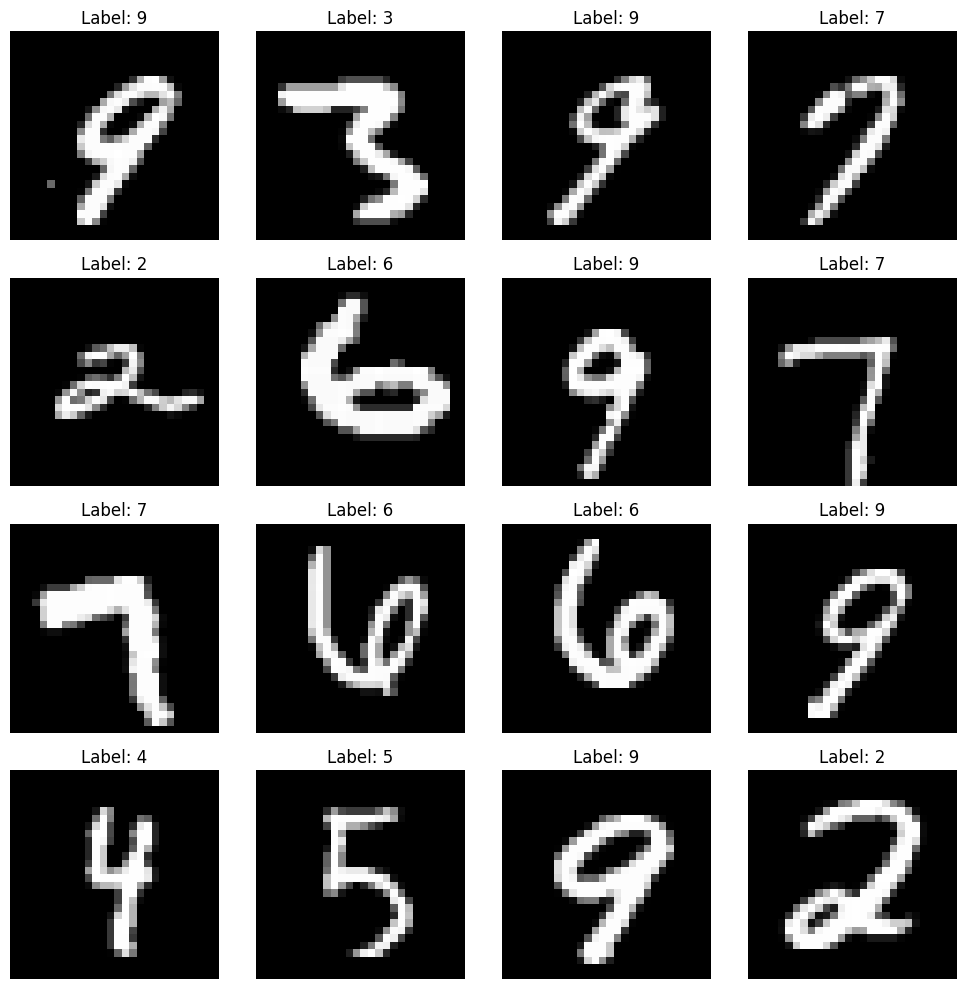

In [39]:
# Get 16 random samples from the train dataset
random_samples = torch.utils.data.random_split(train_dataset, [16, len(train_dataset)-16])[0]

# Plot the images and labels
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for i, (image, label) in enumerate(random_samples):
    ax = axs[i // 4, i % 4]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

#### CNN using PyTorch

Something something here.

In [40]:
class CNN(nn.Module):
    def __init__(self, in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1, pool_size=2, fc1_size=128, fc2_size=10):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=pool_size, stride=pool_size)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels*2, kernel_size=kernel_size, stride=stride, padding=padding)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=pool_size, stride=pool_size)
        
        self.fc1 = nn.Linear(out_channels*2 * 7 * 7, fc1_size)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(fc1_size, fc2_size)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        
        return x

#### CNN Model, loss function, and optimizer

Here we can define the model as well as its hyperparameters. We use the learning rate and weight decay for the optimizer through 'torch.optim.Adam'.

In [47]:
# set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define hyperparameter
lr = 0.001
weight_decay = 0.0001

# Instantiate a CNN model
model = CNN().to(device)

# Declare the loss function
loss_fn = nn.CrossEntropyLoss()

# Declare the optimizer with weight decay
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

#### Training the model

In [ ]:
# Set the model to training mode
model.train()

# Define the number of epochs
num_epochs = 10

print(f"Running on: {device}")

# Training loop for the model
for epoch in range(num_epochs):
    # Initialize the total loss for the epoch
    total_loss = 0
    
    # Iterate over the batches in the train dataloader
    for images, labels in tqdm(train_dataloader):
        # Move the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Calculate the loss
        loss = loss_fn(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update the weights
        optimizer.step()
        
        # Update the total loss for the epoch
        total_loss += loss.item()

    # Calculate the average loss for the epoch
    avg_loss = total_loss / len(train_dataloader)
    
    # Print the epoch, loss, and accuracy values
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

#### Evaluating the model on the test split